In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')


In [22]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [23]:
df.drop('CustomerID', axis = 1, inplace = True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [11]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [12]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.duplicated().sum()

0

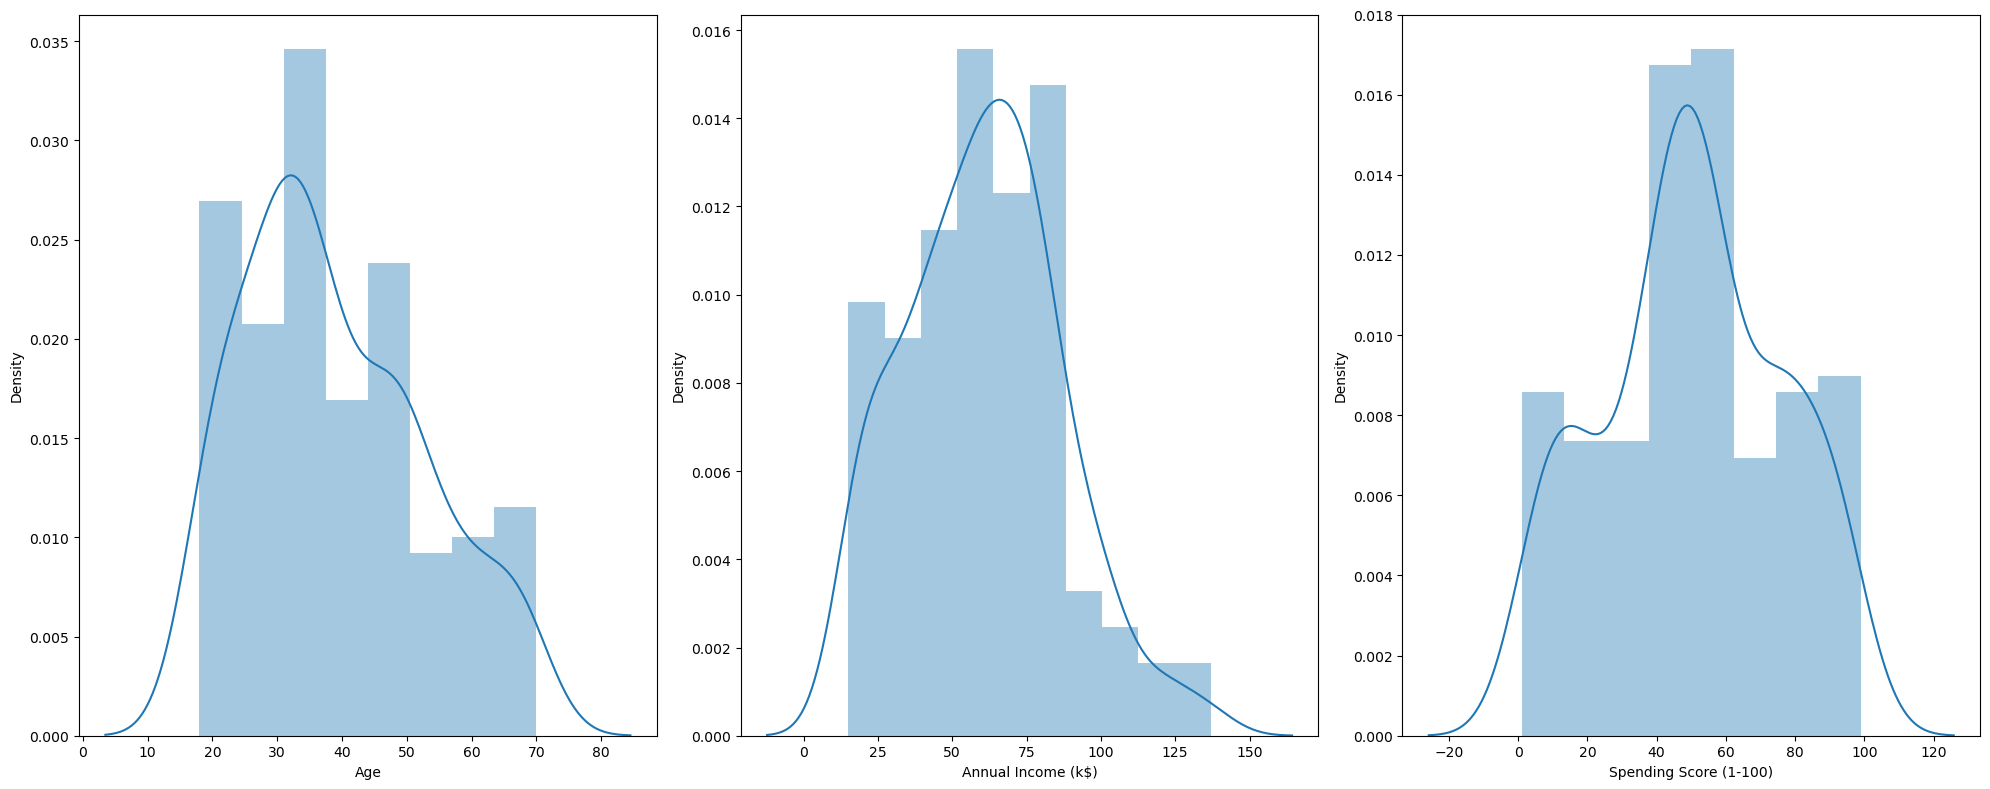

In [14]:
plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.distplot(df[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

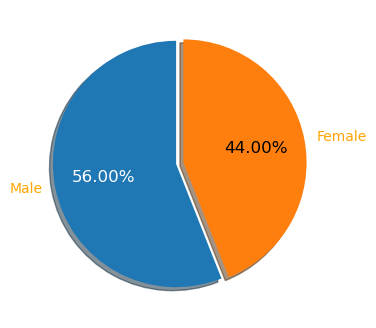

In [15]:
values = df['Gender'].value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize = (4, 4), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'orange')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

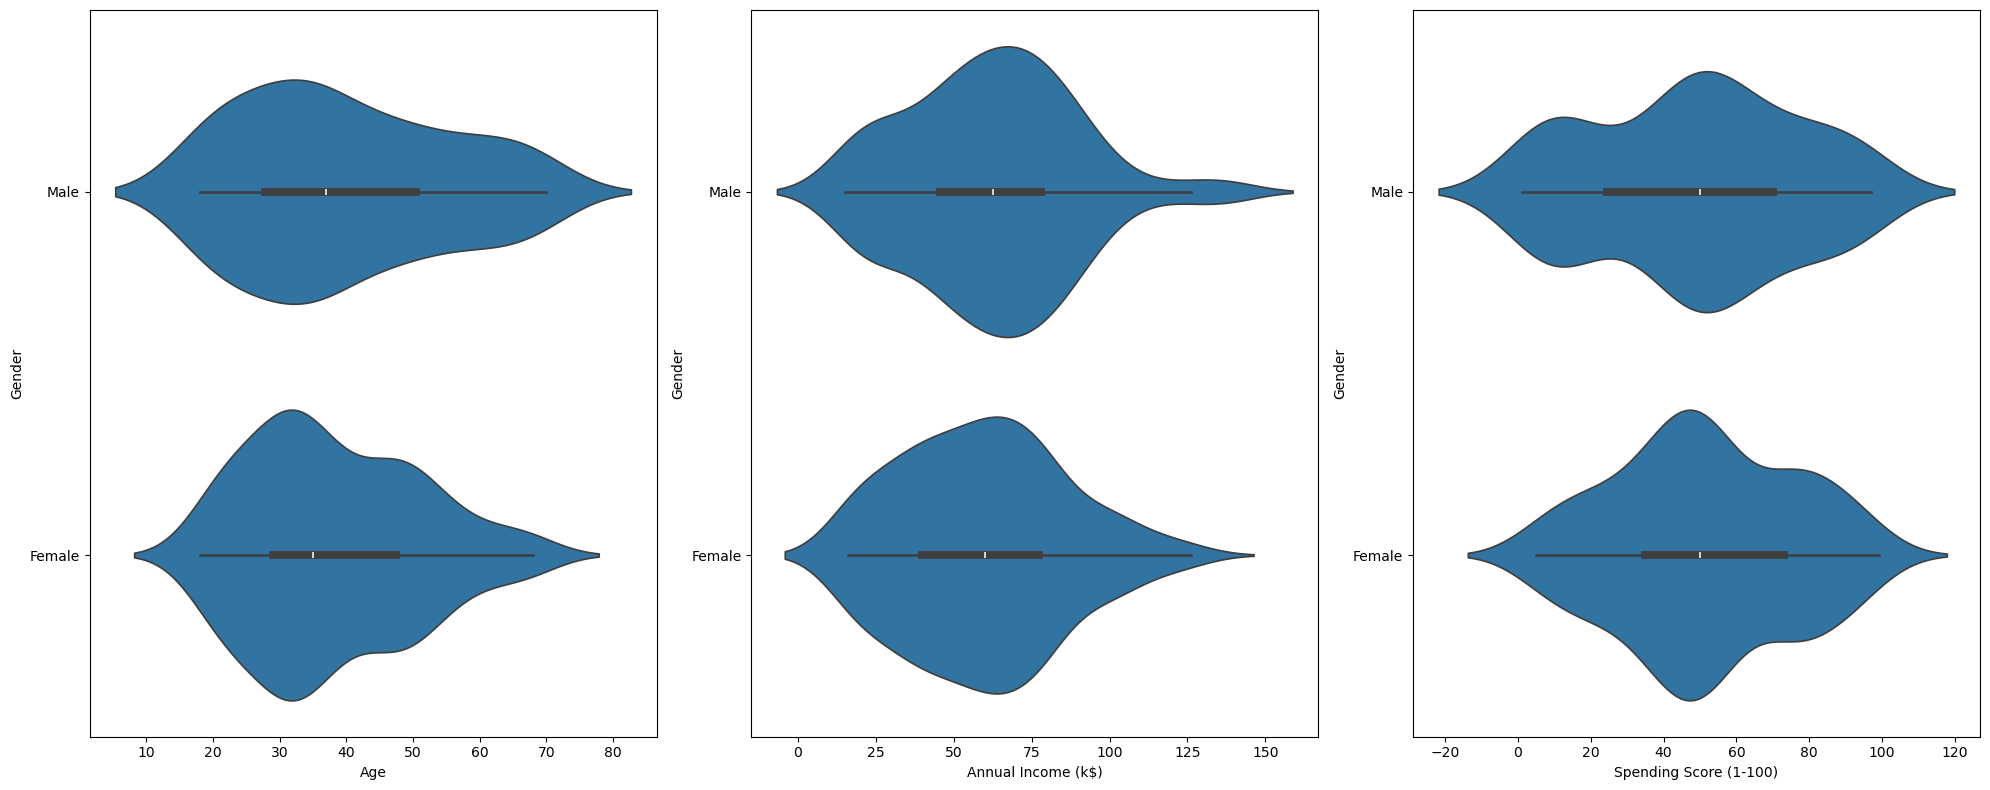

In [16]:
plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.violinplot(x = col, y = 'Gender', data = df)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [17]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 55]

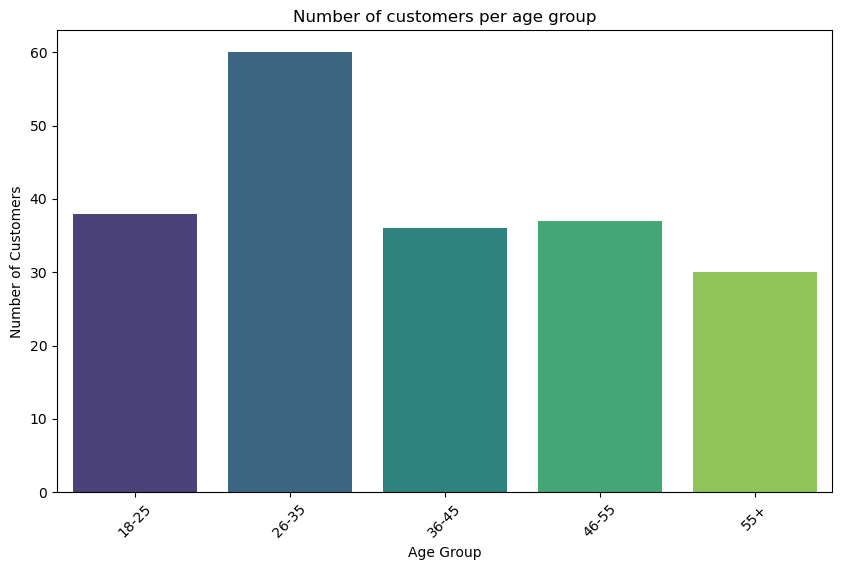

In [25]:
x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
         len(age_55above.values)]
data = {'Age Group': x_age, 'Number of Customers': y_age}
df1 = pd.DataFrame(data)

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='Age Group', y='Number of Customers', palette='viridis')
plt.title('Number of customers per age group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [26]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


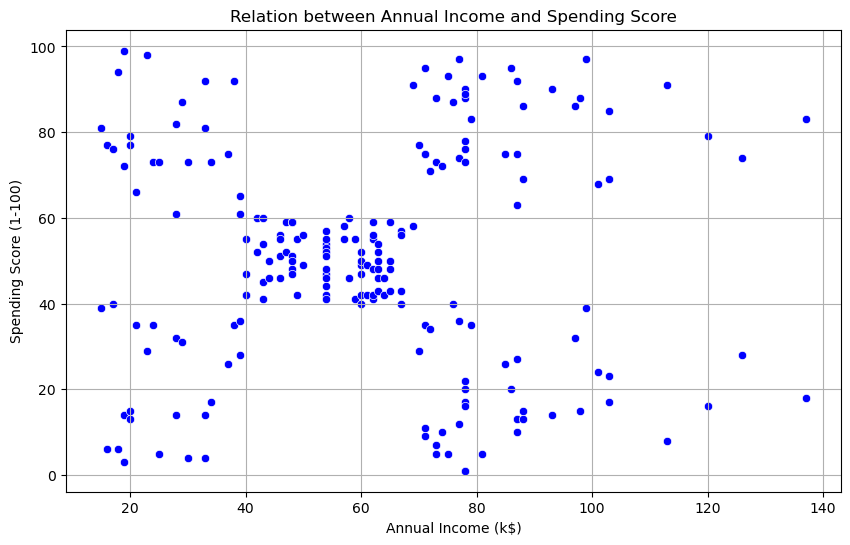

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', color='blue')
plt.title('Relation between Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)  # Add grid lines for better readability
plt.show()

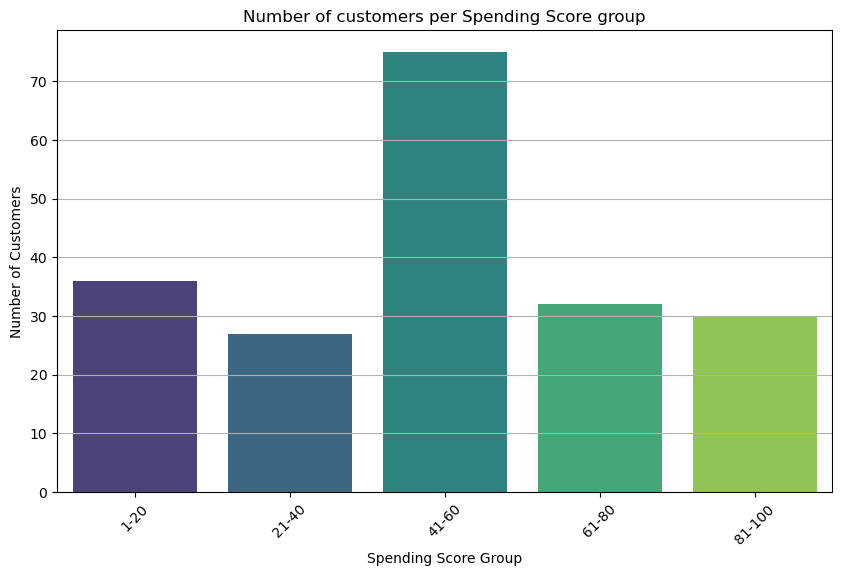

In [29]:
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) &
                                       (df['Spending Score (1-100)'] <= 20)]

ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) &
                                       (df['Spending Score (1-100)'] <= 40)]

ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) &
                                       (df['Spending Score (1-100)'] <= 60)]

ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) &
                                       (df['Spending Score (1-100)'] <= 80)]

ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) &
                                       (df['Spending Score (1-100)'] <= 100)]

x_ss = ['1-20', '21-40', '41-60', '61-80', '81-100']
y_ss = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values),
        len(ss_81_100.values)]


data = {'Spending Score Group': x_ss, 'Number of Customers': y_ss}
df_ss = pd.DataFrame(data)

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_ss, x='Spending Score Group', y='Number of Customers', palette='viridis')
plt.title('Number of customers per Spending Score group')
plt.xlabel('Spending Score Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines on the y-axis for better readability
plt.show()

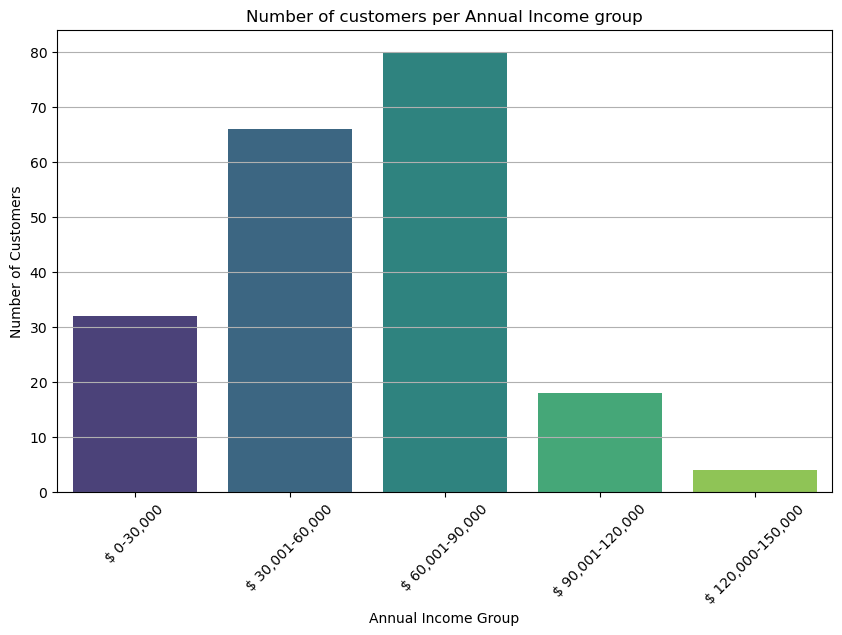

In [30]:
ai_0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
ai_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31)&(df['Annual Income (k$)'] <= 60)]
ai_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61)&(df['Annual Income (k$)'] <= 90)]
ai_91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)']>= 91)&(df['Annual Income (k$)']<=120)]
ai_121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)']>=121)&(df['Annual Income (k$)']<=150)]

x_ai = ['$ 0-30,000', '$ 30,001-60,000', '$ 60,001-90,000', '$ 90,001-120,000', '$ 120,000-150,000']
y_ai = [len(ai_0_30.values) , len(ai_31_60.values) , len(ai_61_90.values) , len(ai_91_120.values),
         len(ai_121_150.values)]

data = {'Annual Income Group': x_ai, 'Number of Customers': y_ai}
df_ai = pd.DataFrame(data)

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_ai, x='Annual Income Group', y='Number of Customers', palette='viridis')
plt.title('Number of customers per Annual Income group')
plt.xlabel('Annual Income Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines on the y-axis for better readability
plt.show()

## K-Means

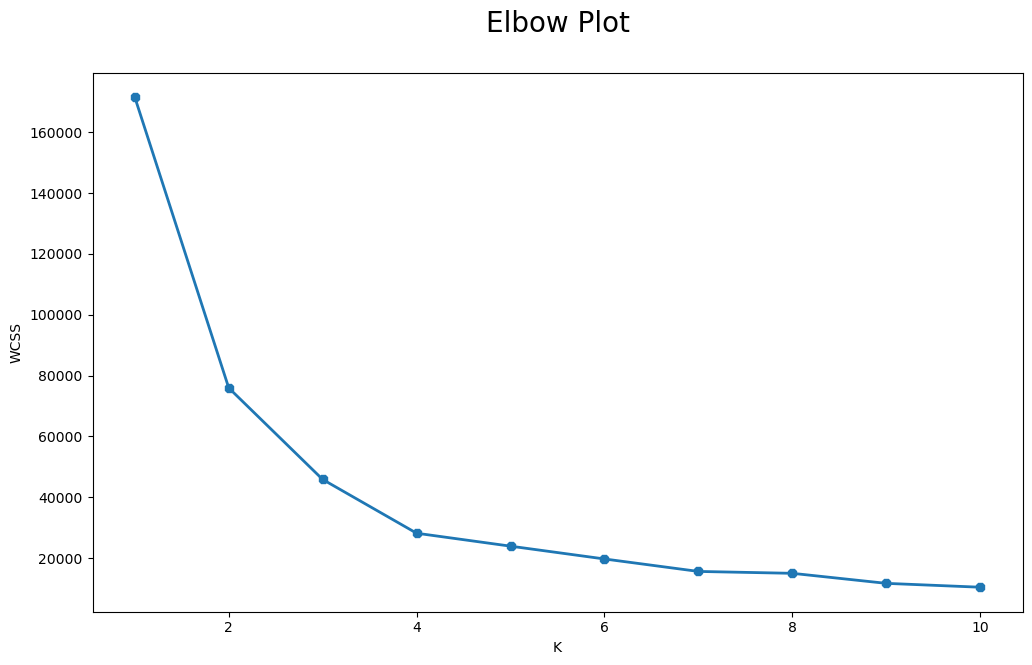

In [31]:
X1 = df.loc[:, ['Age', 'Spending Score (1-100)']].values

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [32]:
kmeans = KMeans(n_clusters = 4)
labels = kmeans.fit_predict(X1)
print(labels)

[1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 1 1 2 0 1 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2
 0 2 0 3 0 3 1 2 1 3 1 1 1 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 1 3 1 1 3 3 1 3 3 1 3 3 1 1 3 3 1 3 1 1 1 3 1 3 1 1 3 3 1 3 1 3 3 3 3 3
 1 1 1 1 1 3 3 3 3 1 1 1 0 1 0 3 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 3 0
 2 0 2 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [33]:
print(kmeans.cluster_centers_)


[[30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


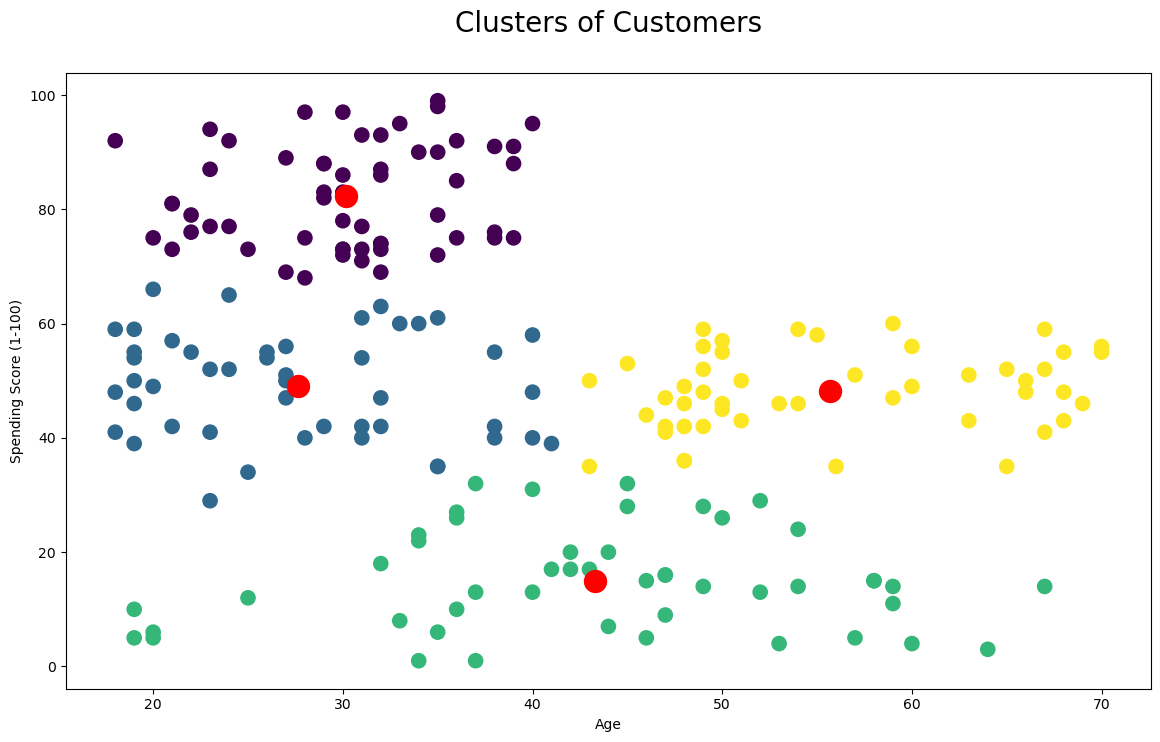

In [34]:
plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

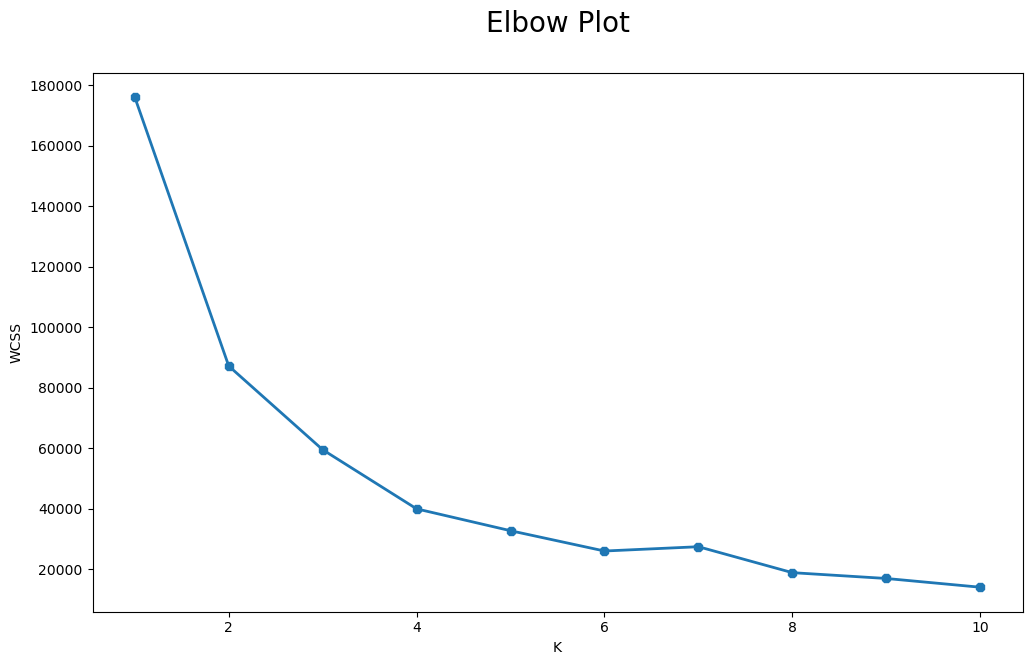

In [35]:
X2 = df.loc[:, ['Age', 'Annual Income (k$)']].values

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(X2)
print(labels)

[0 0 0 0 0 0 0 0 4 0 4 0 4 0 0 0 0 0 4 0 0 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 0 0 4 0 4 0 4 0 4 0 0 0 4 0 0 4 4 4 4 2 0 4 2 0 2 2 2 0 4 2 0 0 2 2 2 2
 2 1 2 2 1 2 2 2 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [37]:
print(kmeans.cluster_centers_)


[[ 26.85365854  29.6097561 ]
 [ 31.625       72.875     ]
 [ 56.55        57.725     ]
 [ 39.         106.5       ]
 [ 51.91304348  34.17391304]]


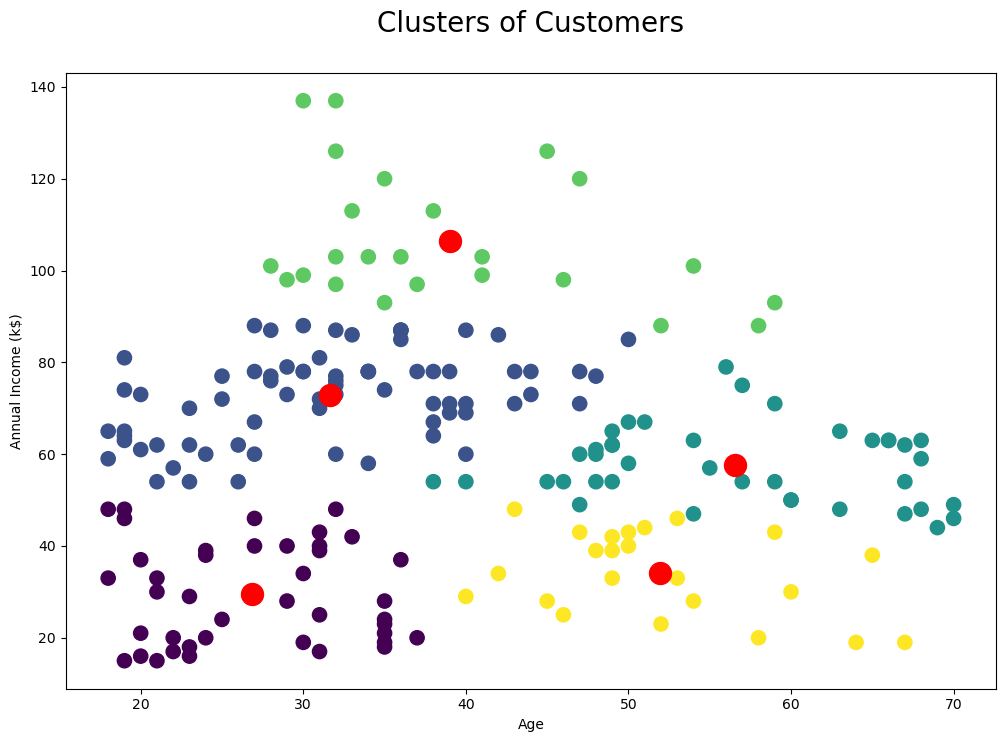

In [38]:
plt.figure(figsize = (12, 8))

plt.scatter(X2[:, 0], X2[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

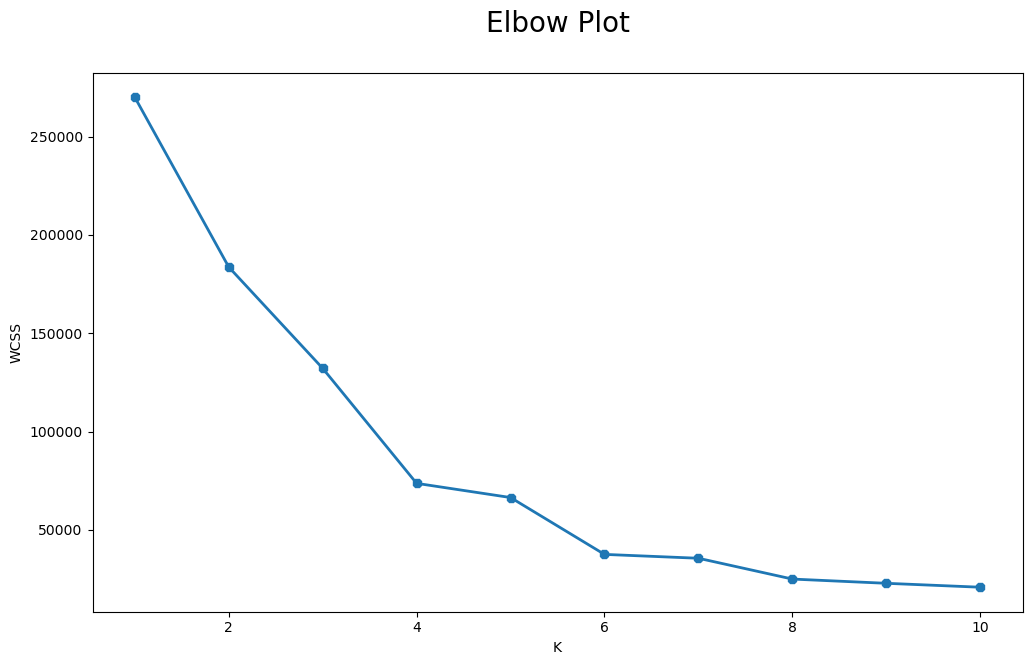

In [39]:
X3 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(X3)
print(labels)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [41]:
print(kmeans.cluster_centers_)


[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


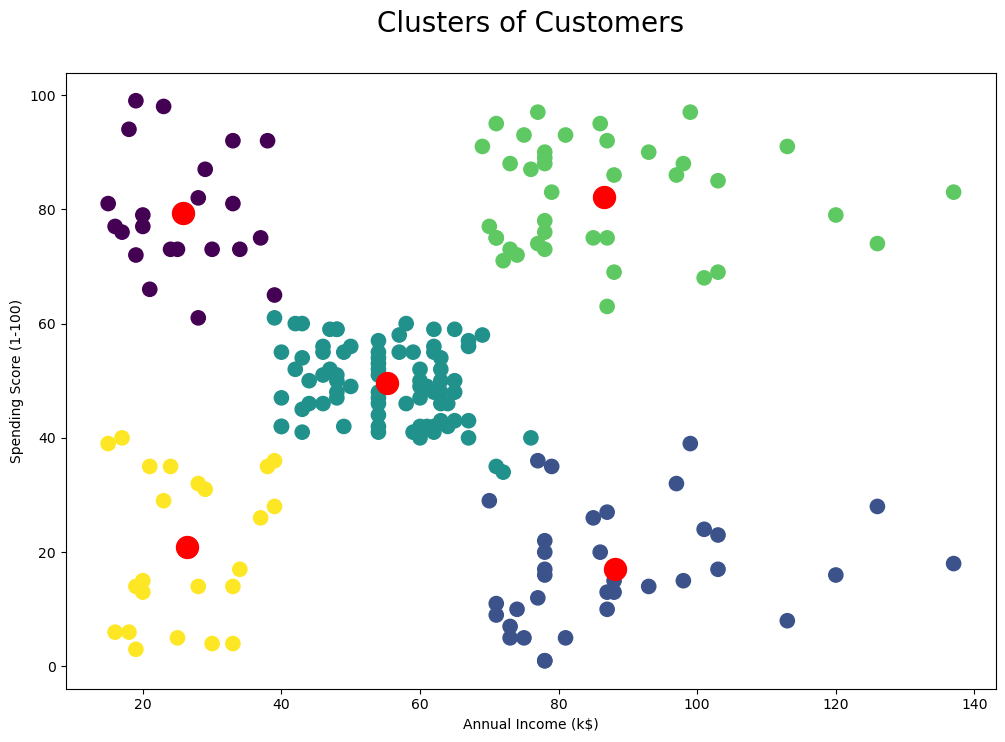

In [42]:
plt.figure(figsize = (12, 8))

plt.scatter(X3[:, 0], X3[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

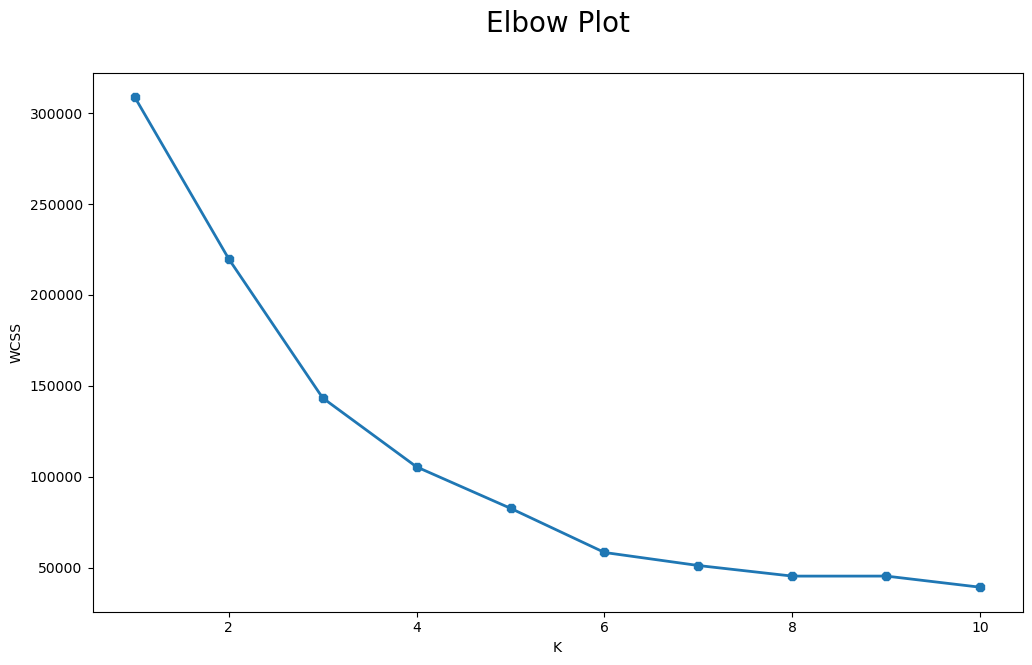

In [43]:
X4 = df.iloc[:, 1:]

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 6)
clusters = kmeans.fit_predict(X4)
X4['label'] = clusters

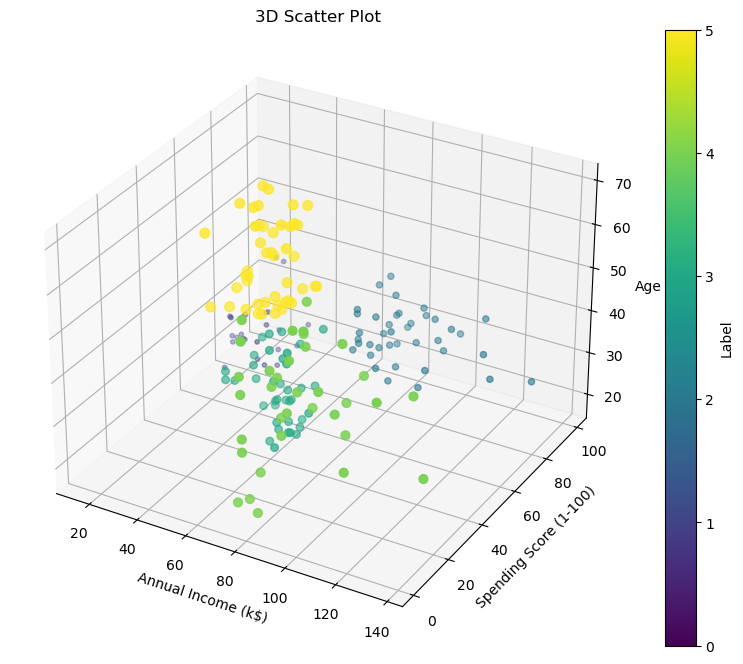

In [45]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X4['Annual Income (k$)'], X4['Spending Score (1-100)'], X4['Age'],
                     c=X4['label'], cmap='viridis', s=X4['label'] * 10)

# Add labels and title
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.set_title('3D Scatter Plot')

# Add color bar
cbar = fig.colorbar(scatter)
cbar.set_label('Label')

plt.show()

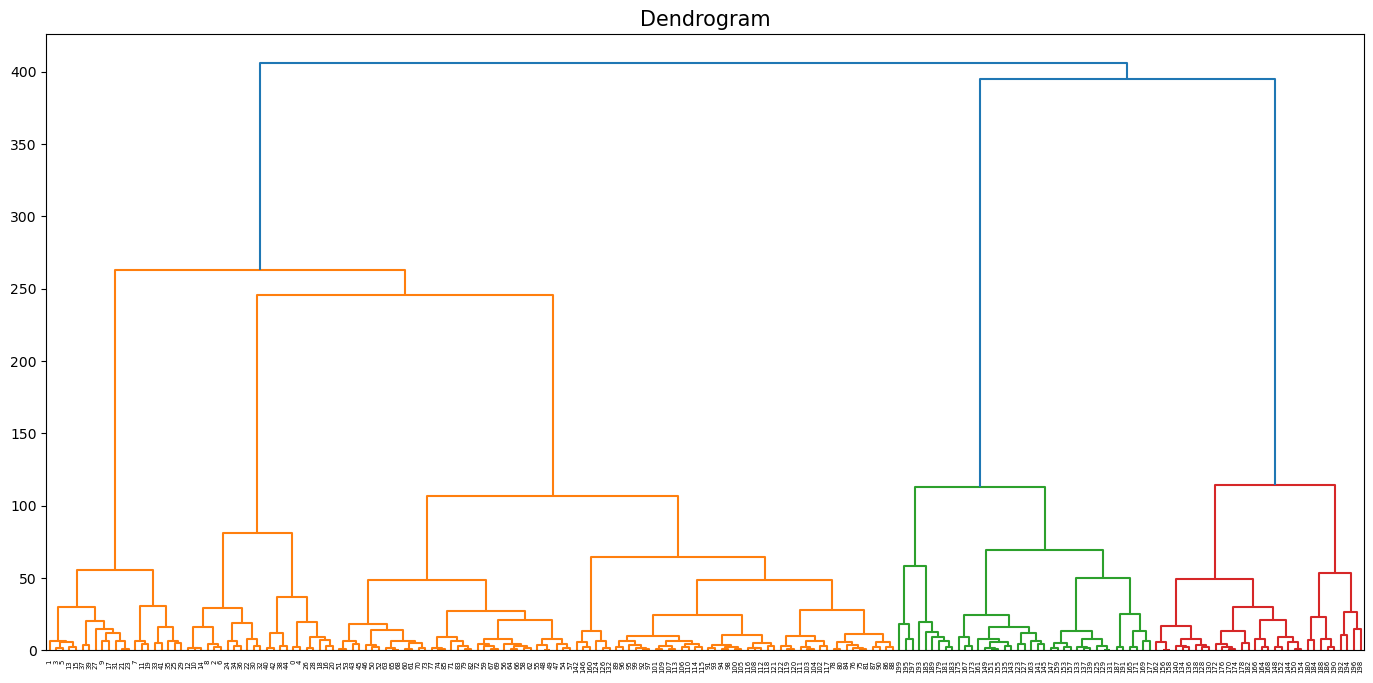

In [46]:
plt.figure(figsize = (17, 8))

dendo = dendrogram(linkage(X3, method = 'ward'))
plt.title('Dendrogram', fontsize = 15)
plt.show()

In [48]:
from sklearn.cluster import AgglomerativeClustering

# Assuming X3 is your data

agc = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = agc.fit_predict(X3)

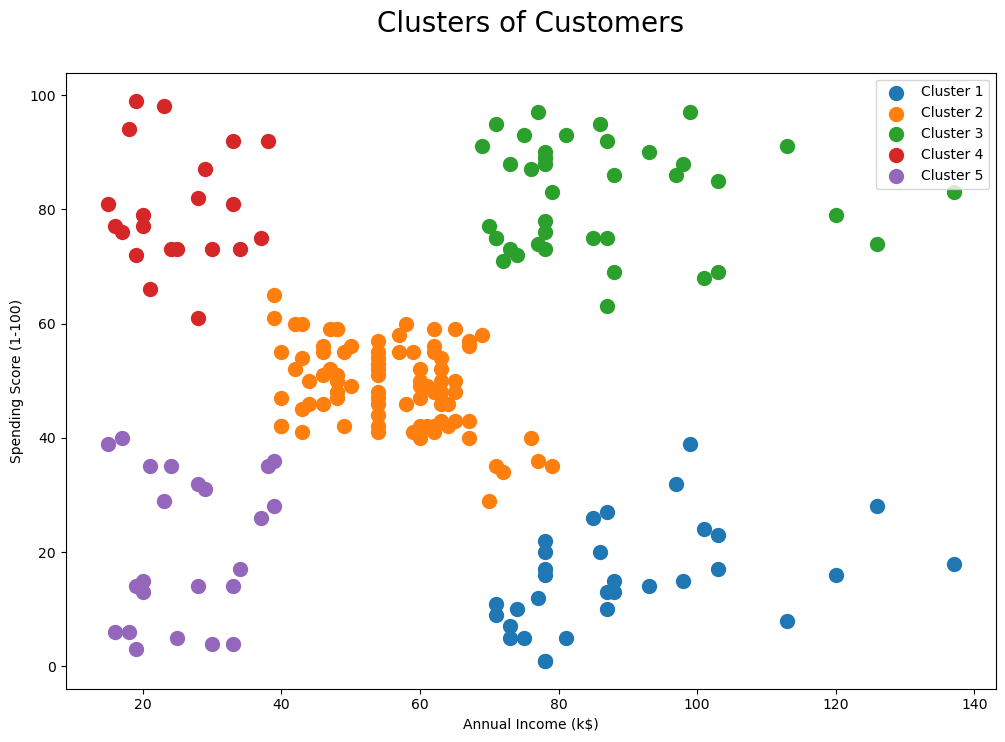

In [49]:
plt.figure(figsize = (12, 8))

plt.scatter(X3[labels == 0,0], X3[labels == 0,1], label = 'Cluster 1', s = 100)
plt.scatter(X3[labels == 1,0], X3[labels == 1,1], label = 'Cluster 2', s = 100)
plt.scatter(X3[labels == 2,0], X3[labels == 2,1], label = 'Cluster 3', s = 100)
plt.scatter(X3[labels == 3,0], X3[labels == 3,1], label = 'Cluster 4', s = 100)
plt.scatter(X3[labels == 4,0], X3[labels == 4,1], label = 'Cluster 5', s = 100)

plt.legend(loc = 'best')
plt.title('Clusters of Customers\n ', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## DBSCAN

In [50]:
centers = [[1, 1], [-1, -1], [1, -1]]  
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, 
                            random_state=0)  # generate sample blobs

X = StandardScaler().fit_transform(X)

In [51]:
# DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

# we are calculating these for showcasing in diagram
# creating an array of true and false as the same size as db.labels
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  
core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True
labels = db.labels_  # similar to the model.fit() method, it gives the labels of the clustered data

In [52]:
# Number of clusters in labels, ignoring noise if present.

# the label -1 is considered as noise by the DBSCAN algorithm
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
n_noise_ = list(labels).count(-1)  # calculating the number of clusters

In [53]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

"""Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters
contain only data points which are members of a single class."""

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953


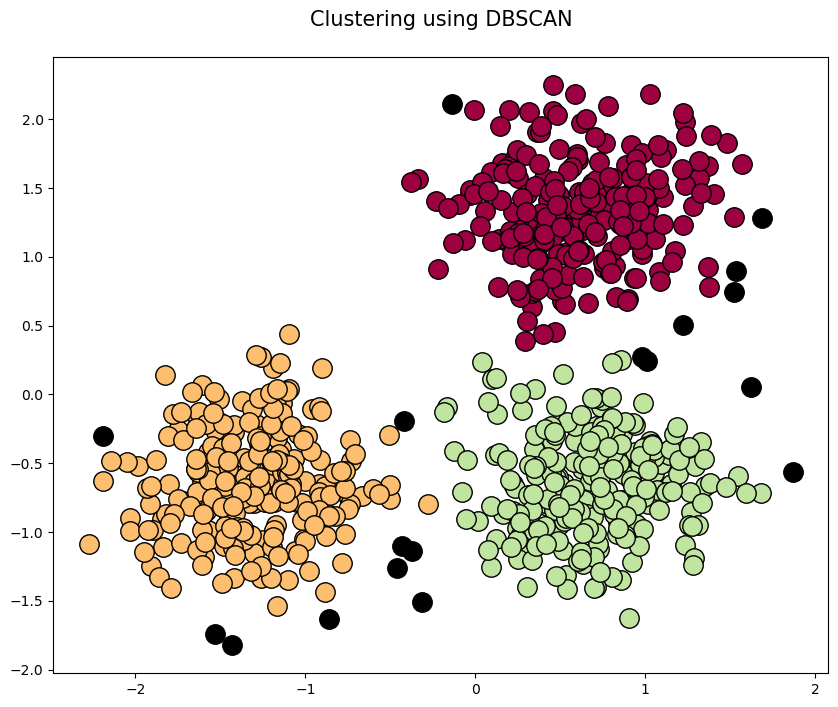

In [54]:
# Plot result
plt.figure(figsize = (10, 8))

# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          # creating the list of colours, generating the colourmap
          for each in np.linspace(0, 1, len(unique_labels))]  

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)   # assigning class members for each class
    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class  
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points   
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    
plt.title('Clustering using DBSCAN\n', fontsize = 15)
plt.show()